<a href="https://colab.research.google.com/github/Abhinav2508/Breast_Cancer_Prediction-using-deep-learning/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author  
**Abhinav Kumar**

* 🔗 LinkedIn - https://www.linkedin.com/in/abhinav-kumar-b0b0ba253/

* Github - https://github.com/Abhinav2508

### **Import the dependancy**

In [1]:
# import the dependancy
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target



In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

([<matplotlib.axis.XTick at 0x797ec8c572d0>,
 [Text(0, 0, 'Malignant (0)'), Text(1, 0, 'Benign (1)')])

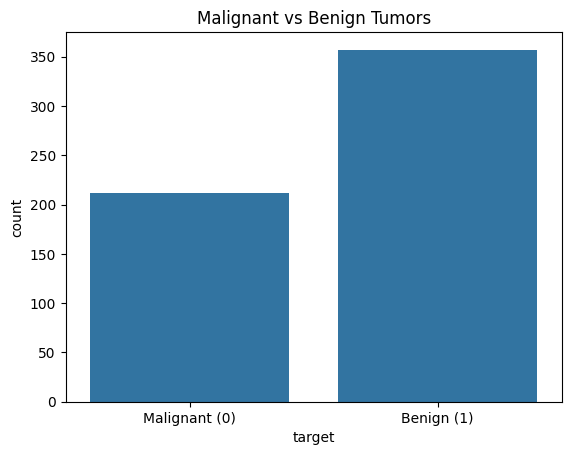

In [8]:
sns.countplot(x='target', data=df)
plt.title('Malignant vs Benign Tumors')
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])


## **Train test split**

In [9]:


X = df.drop('target', axis=1)
y = df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(455, 30)

## **making nural network**

In [15]:
model = Sequential()

model.add(Dense(30, activation='relu', input_dim=30))   # Input

model.add(Dense(30, activation='relu'))                 # Hidden 1
model.add(Dense(60, activation='relu'))                 # Hidden 2
model.add(Dense(30, activation='relu'))                 # Hidden 3

model.add(Dense(1, activation='sigmoid'))               # Output

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,581 (21.80 KB)

 Trainable params: 5,581 (21.80 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [18]:

model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6750 - loss: 0.6574 - val_accuracy: 0.9011 - val_loss: 0.5063
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9093 - loss: 0.4815 - val_accuracy: 0.9341 - val_loss: 0.3381
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9381 - loss: 0.2917 - val_accuracy: 0.9341 - val_loss: 0.2088
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9260 - loss: 0.2062 - val_accuracy: 0.9451 - val_loss: 0.1524
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9486 - loss: 0.1460 - val_accuracy: 0.9560 - val_loss: 0.1256
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9498 - loss: 0.1179 - val_accuracy: 0.9670 - val_loss: 0.1104
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9618 - loss: 0.1048 - val_accuracy: 0.9670 - val_loss: 0.1012
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9710 - loss: 0.0786 - val_accuracy: 0.9670 

In [19]:
train_pred = model.predict(X_train)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [20]:
train_pred = np.where(train_pred>0.5,1,0)


In [21]:
test_pred = model.predict(X_test)
test_pred = np.where(test_pred>0.5,1,0)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
print('Train acc :- ', accuracy_score(y_train,train_pred))
print('Test confusion_matrix :- \n', confusion_matrix(y_test,test_pred))

Train acc :-  0.9956043956043956
Test confusion_matrix :- 
 [[41  2]
 [ 0 71]]


In [24]:
print('Test acc :- ', accuracy_score(y_test,test_pred))
print('Test confusion_matrix :- \n', confusion_matrix(y_test,test_pred))

Test acc :-  0.9824561403508771
Test confusion_matrix :- 
 [[41  2]
 [ 0 71]]


In [25]:
from sklearn.metrics import precision_score


In [26]:
precision = precision_score(y_train, train_pred)
print("Precision:", precision)


Precision: 0.9965034965034965


In [27]:
from sklearn.metrics import accuracy_score
print('Train acc :- ', accuracy_score(y_train,train_pred))

Train acc :-  0.9956043956043956


In [28]:
x_train[0]

array([-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
        0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
       -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
        3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
       -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
        1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014])

In [29]:
sample = np.array([[
    -1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
     0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
    -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
     3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
    -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
     1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014
]])

# Predict
prediction = model.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [30]:
predicted_class = np.where(prediction > 0.5, 1, 0)

print("Predicted Probability:", prediction[0][0])
print("Predicted Class:", predicted_class[0][0])

Predicted Probability: 1.0
Predicted Class: 1


In [31]:
x_train[1]

array([ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
        3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
        0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
        1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
        2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
        3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848])

In [32]:
sample2 = np.array([[ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
        3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
        0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
        1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
        2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
        3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848]])
prediction = model.predict(sample2)
predicted_class = np.where(prediction > 0.5, 1, 0)

print("Predicted Probability:", prediction[0][0])
print("Predicted Class:", predicted_class[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Probability: 6.1606864e-29
Predicted Class: 0


In [33]:
x_train[11]

array([ 1.9769275 ,  0.31327591,  1.90233452,  2.05786602,  0.0788037 ,
        0.26483378,  0.86043609,  1.76809679, -0.93595811, -0.85350634,
        0.92729216,  0.29254864,  0.81382428,  0.88628269, -0.49847317,
       -0.26285216, -0.03032279,  0.4399518 , -1.25977636, -0.5802499 ,
        1.96523962,  1.07854631,  1.83265153,  2.01924985,  0.22847029,
        0.37042607,  0.79030033,  1.74421993, -1.00983488, -0.53947146])

In [34]:
sample3 = np.array([[ 1.9769275 ,  0.31327591,  1.90233452,  2.05786602,  0.0788037 ,
        0.26483378,  0.86043609,  1.76809679, -0.93595811, -0.85350634,
        0.92729216,  0.29254864,  0.81382428,  0.88628269, -0.49847317,
       -0.26285216, -0.03032279,  0.4399518 , -1.25977636, -0.5802499 ,
        1.96523962,  1.07854631,  1.83265153,  2.01924985,  0.22847029,
        0.37042607,  0.79030033,  1.74421993, -1.00983488, -0.53947146]])

prediction = model.predict(sample3)
predicted_class = np.where(prediction > 0.5, 1, 0)

print("Predicted Probability:", prediction[0][0])
print("Predicted Class:", predicted_class[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Probability: 4.3101396e-18
Predicted Class: 0
